## Data Exploration:

   # Step 1: Data Collection

Goal: Gather data from various sources (databases, files, APIs, etc.).

Key Actions:

Identify and access relevant data sources.
Ensure data formats are compatible with processing tools.

Output: data collected from the given link which are in the structured CSV format


In [1]:
# importing required libraries
import pandas as pd  # pandas library
import numpy as np   # numphy library
import random        # random generation of number
import os            # to see the path of the current file

In [2]:
print(os.getcwd()) # displays the current path of file

c:\Users\JalpaZenisha\DSI\DSI_Team_Project_Bank_Marketing\experiments


In [3]:
#Reading Dataset
df = pd.read_csv('../data/raw/bank-full.csv',sep=';')  # reading the full dataset of bank
print(df.head())
print(df.shape)
# Reading the subset of full bank dataset
df_sub = pd.read_csv('../data/raw/bank.csv',sep=';')  # reading the subset(Sampling) dataset of bank
print(df_sub.head())
print(df_sub.shape)


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
(45211, 17)
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  marri

The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 

      1) bank-full.csv with all examples (45211), ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
      
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

1. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

2. Number of Attributes: 16 + output attribute.

3. Attribute information:

   Input variables:
   
**bank client data:**

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   **related with the last contact of the current campaign:**

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

   10 - day: last contact day of the month (numeric)

   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

   12 - duration: last contact duration, in seconds (numeric)

   **other attributes:**

   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

   15 - previous: number of contacts performed before this campaign and for this client (numeric)

   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  

  Output variable (desired target):
   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

4. Missing Attribute Values: None

In [4]:
# Exploring the data completeness and data type of our variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Initial Observations:**

The datasets contain customer information, including demographics, account details, and outcomes of bank marketing campaigns.

All columns contain 45,211 non-null values, meaning there are no missing values in any column.
This ensures data completeness, which is a positive aspect since no immediate imputation or removal of rows is necessary.

Data types appear consistent, with a mix of integers and categorical (object) data.
The target variable (y) indicates whether a customer subscribed to a term deposit.

7 columns are of data type int64 (integer).
These columns are numerical and likely represent continuous or discrete variables.

10 columns are of data type object.
These are categorical variables and may need to be encoded into numerical values if we are going to use them as features in our model.



In [5]:
# Get descriptive statistics for numerical columns
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Insights from the Data (statistics output)**

Age: The average client age is 40.936 = 41 years, with a range from 18(min) to 95(max).

Balance: The average balance is €1362, with a large variability (std = €3044), with extreme (possible outliers) values -8019 euro and 102127 euro.

Duration: The average call duration is 258 seconds (approx 4 minutes).

Campaign: Most clients were contacted on an average of 3 times, between 1 and 3 times most of the clients. with extreme (possible outlier) value of 63 times.

Previous: Most clients were contacted first time for this campaign. with extreme(possible outlier) value 275 times.

Below are the Possible Outliers: (to investigate)

Balance: A minimum balance of -€8019 and a maximum balance of €102,127, indicating a few extreme values.

Duration: Calls as short as 0 seconds and as long as 4918 seconds ( approx 82 minutes), suggesting potential outliers.

Campaign: Some clients were contacted up to 63 times, which is unusually high.

Previous: some clients were contacted 275 times previously before this campaign.


   # Step 2: Data Cleaning and Transformation:

The initial step involves cleaning and preparing the raw data to remove inconsistencies, handle missing values, and make the dataset ready for analysis. 

1. Check for Missing Values: Ensure there are no null values.
2. Handle Duplicates: Identify and remove any duplicate rows.
3. Consistant Data for Analysis: Ensure consistent formats for categorical data (e.g., month values).


In [6]:
# Check for missing values in both datasets
missing = df.isnull().sum()
missing_sub = df_sub.isnull().sum()

# Identify duplicate rows: Check for duplicates in both datasets
duplicates = df.duplicated().sum()
duplicates_sub = df_sub.duplicated().sum()

missing, missing_sub, duplicates, duplicates_sub


(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 0,
 0)

Looks like there are no missing values in our data. However, if we look at the categorical data there are 'unknown' values which we can consider as 'missing' data.

Also, there are no duplicates rows in our data.
We will follow below steps to handle 'unknown' values from "job', 'education','contact' and 'poutcome' columns.
First, calculate the percentage of "unknown" values in each column to understand the extent of the issue.



In [7]:
# selected only categorical columns

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# count unknown values in each column

unknown_counts = df[categorical_columns].apply(lambda col: (col == "unknown").sum())

print(unknown_counts) # the output will give unknown counts for each categorical columns

job            288
marital          0
education     1857
default          0
housing          0
loan             0
contact      13020
month            0
poutcome     36959
y                0
dtype: int64


In [8]:
# # Calculate the percentage of 'unknown' values in each relevant column
columns_with_unknowns = ['job', 'education', 'poutcome', 'contact']
for col in columns_with_unknowns:
    unknown_count = df[df[col] == 'unknown'].shape[0]
    total_count = df.shape[0]
    percentage = (unknown_count / total_count) * 100
    print(f"Column: {col}, Unknown Values: {unknown_count}, Percentage: {percentage:.2f}%")


Column: job, Unknown Values: 288, Percentage: 0.64%
Column: education, Unknown Values: 1857, Percentage: 4.11%
Column: poutcome, Unknown Values: 36959, Percentage: 81.75%
Column: contact, Unknown Values: 13020, Percentage: 28.80%


**job and education:**  These are likely important features for predicting the target.
the percentage of unknown values in 'job' and 'education' are 0.64% and 4.11%. which are very low.

We will replace 'unknown' rows with mode value of that column.

**contact and poutcome:**

These columns have a high proportion (>30%) of "unknown" values and if their **impact** on the target variable (y) seems minimal, then we can remove them entirely.

Let's check impact of 'contact' and 'potcome' on the target variable(y).


**Perform Chi-Square Test (Categorical Association)**

A chi-square test can help determine whether there is a statistically significant association between the column (contact or poutcome) and the target variable (y).

Interpretation:
A p-value < 0.05 indicates a statistically significant relationship between the column and the target variable (y).
A high p-value (>0.05) suggests the column has little impact on the target.


In [9]:
from scipy.stats import chi2_contingency

# Create contingency tables for 'contact' and 'poutcome'
contact_table = pd.crosstab(df['contact'], df['y'])
poutcome_table = pd.crosstab(df['poutcome'], df['y'])

# Perform chi-square test
contact_chi2, contact_p, _, _ = chi2_contingency(contact_table)
poutcome_chi2, poutcome_p, _, _ = chi2_contingency(poutcome_table)

print(f"Contact - Chi-square p-value: {contact_p}")
print(f"Poutcome - Chi-square p-value: {poutcome_p}")


Contact - Chi-square p-value: 1.251738325340638e-225
Poutcome - Chi-square p-value: 0.0


In [10]:
check= [contact_p, poutcome_p] 

for col in check:
    if col >= 0.05:
        print("there is no association with", col)
    else:
        print("there is significant association with ", col)

there is significant association with  1.251738325340638e-225
there is significant association with  0.0


Conclusion: we will retain the 'contact' and 'poutcome' columns from the data df. 
We have two options: 
1. continue as is with 'unkown' values
2. replace 'unknown' values by mode value of that column.

In [11]:
# finding mode for 'contact' and 'potcome'
mode_contact = df['contact'].mode()[0]
mode_poutcome = df['poutcome'].mode()[0]

print("mode value of contact : ", mode_contact)
print("mode value of poutcome: ", mode_poutcome)

# finding mode for 'job' and 'education'
mode_job = df['job'].mode()[0]
mode_education = df['education'].mode()[0]
print("mode value of job : ", mode_job)
print("mode value of education: ", mode_education)


mode value of contact :  cellular
mode value of poutcome:  unknown
mode value of job :  blue-collar
mode value of education:  secondary


In [12]:
# Replacing 'unknow' values by relevant column's mode value
df_cleaned=df
for col in ['job', 'education','contact','poutcome']:
    mode_value = df[col].mode()[0]
    df_cleaned[col] = df_cleaned[col].replace('unknown',mode_value)
    print(df_cleaned[col])
    

0          management
1          technician
2        entrepreneur
3         blue-collar
4         blue-collar
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object
0         tertiary
1        secondary
2        secondary
3        secondary
4        secondary
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object
0         cellular
1         cellular
2         cellular
3         cellular
4         cellular
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact, Length: 45211, dtype: object
0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45206    unknown
45207    unknown
45208    success
45209    unknown
45210      other
Name: poutcome, Length:

After checking for missing and duplicate values our dataset is df_cleaned ready for Exploratory Data Analysis!

# Step:3 Exploratory Data Analysis

Goal: Gain insights into the dataset and understand relationships between variables.

Actions:
- Summarize numerical and categorical variables.
- Visualize distributions, correlations, and trends.
- Identify outliers.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\JalpaZenisha\AppData\Local\Temp\ipykernel_7844\2460870680.py:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ygraph = sns.scatterplot(data = df_cleaned,


[Text(0.5, 1.0, 'month vs. Campaign'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Campaign')]

c:\Users\JalpaZenisha\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\JalpaZenisha\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


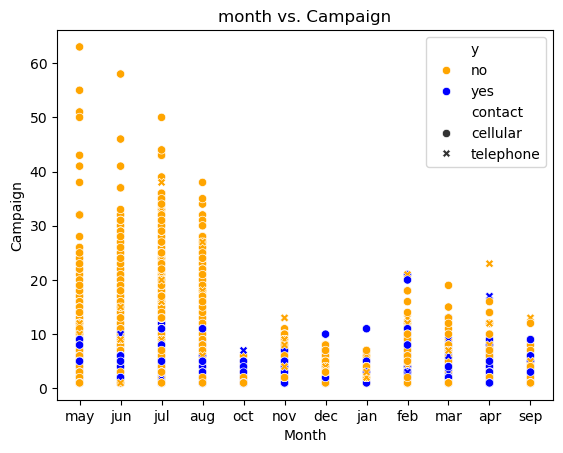

In [15]:
# adding multiple variables to graph
ygraph = sns.scatterplot(data = df_cleaned, 
                           x = 'month',
                           y = 'campaign',
                           style = 'contact',
                           hue = 'y',
                           palette = ['orange', 'blue','deepskyblue', 'yellowgreen'])

# by default it takes lunch and dinner markers
ygraph.set(title = 'month vs. Campaign',
             xlabel = 'Month',
             ylabel = 'Campaign')


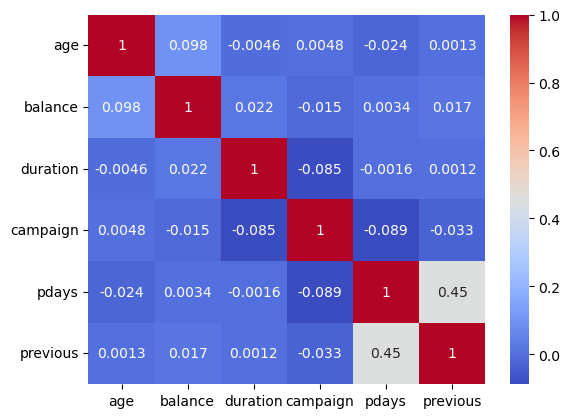

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Correlation heatmap for numeric columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
sns.heatmap(df_cleaned[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()


TypeError: plot() got an unexpected keyword argument 'x'

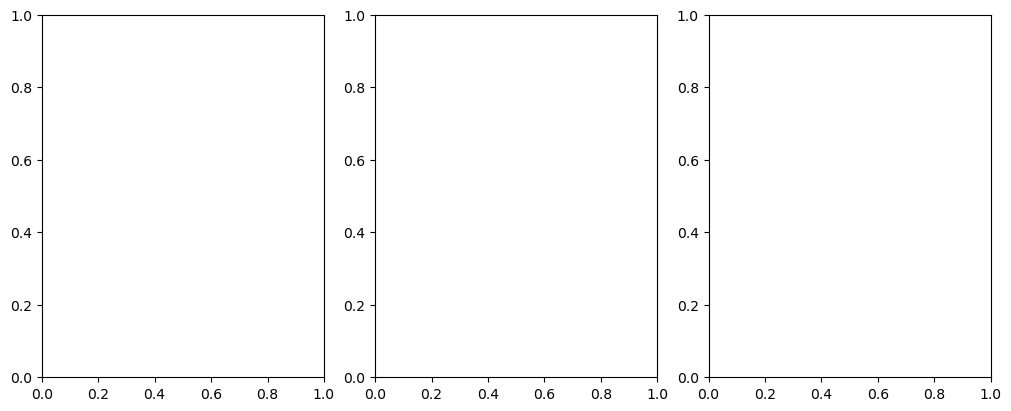

In [19]:
fig,someaxes = plt.subplot_mosaic([['ax1', 'ax2', 'ax3']],
                                  figsize=(10,4),
                                  layout="constrained")
someaxes["ax1"].plot(data=df, x='poutcome', hue='y')
someaxes["ax2"].plot(data=df, x='contact', hue='y')
someaxes["ax3"].bar(data=df, x='contact', hue='y')


someaxes["ax1"].set_xlabel("A big Label", fontsize = 18)
someaxes["ax2"].set_xlabel("Another Label", fontsize = 18)
someaxes["ax3"].set_xlabel("Label 2: 2 Fast 2 Furious", fontsize = 18)

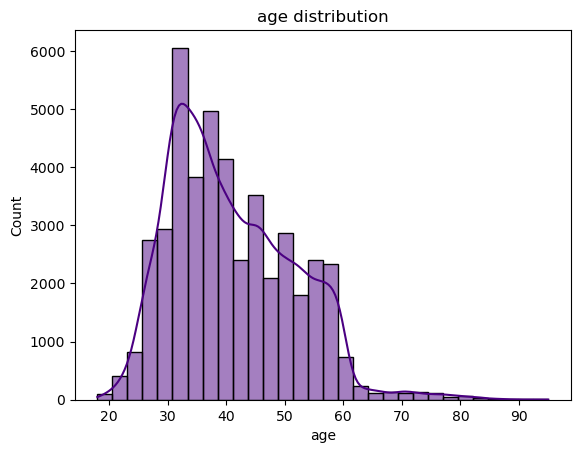

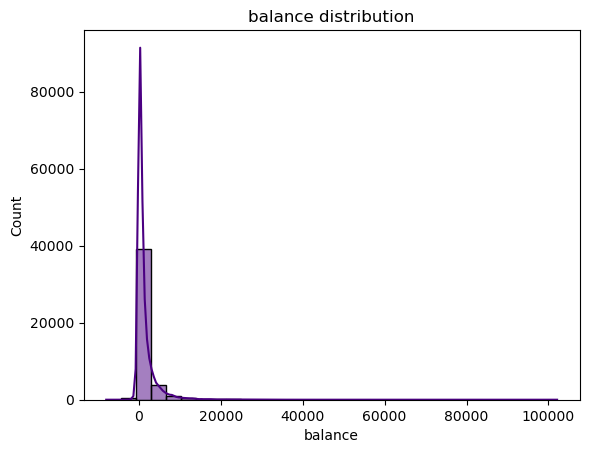

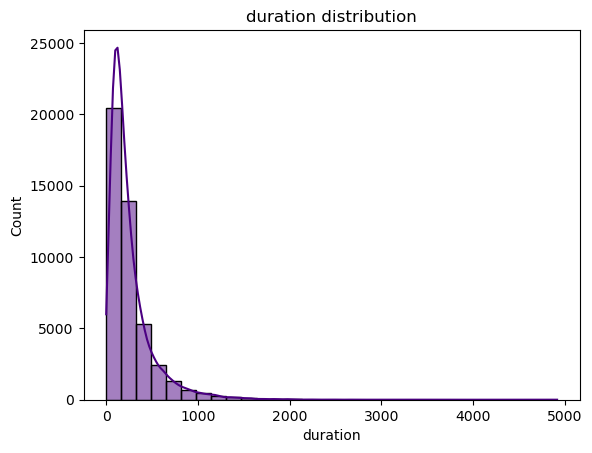

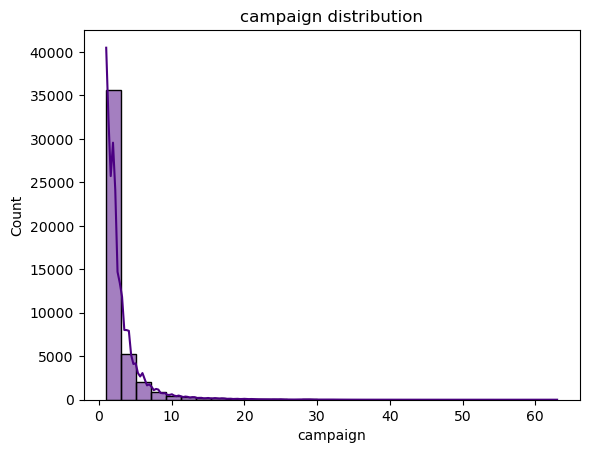

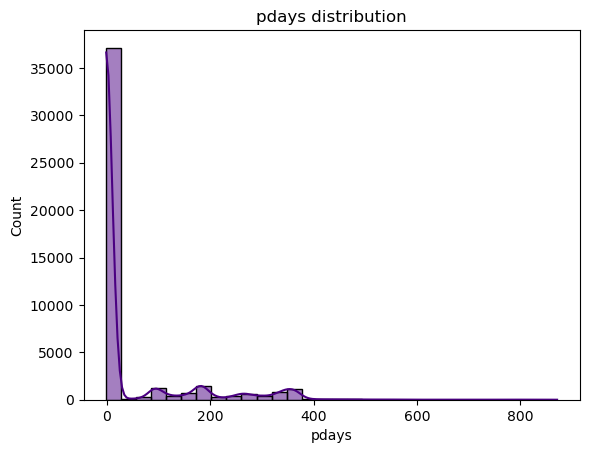

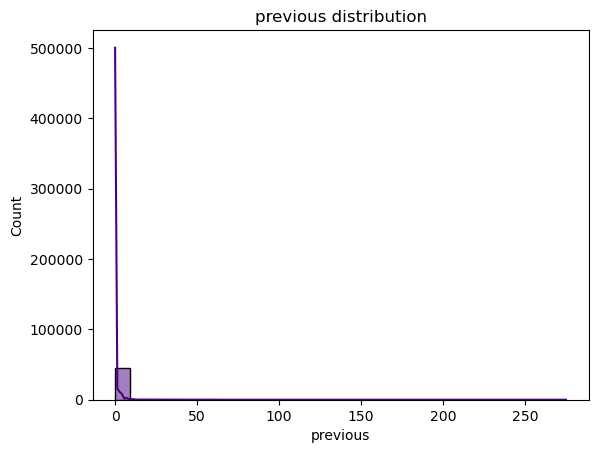

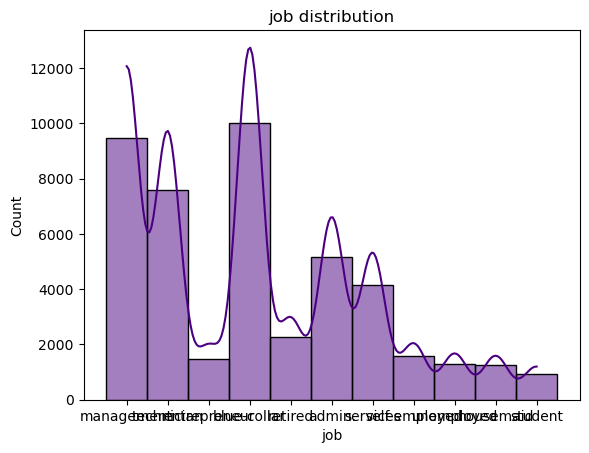

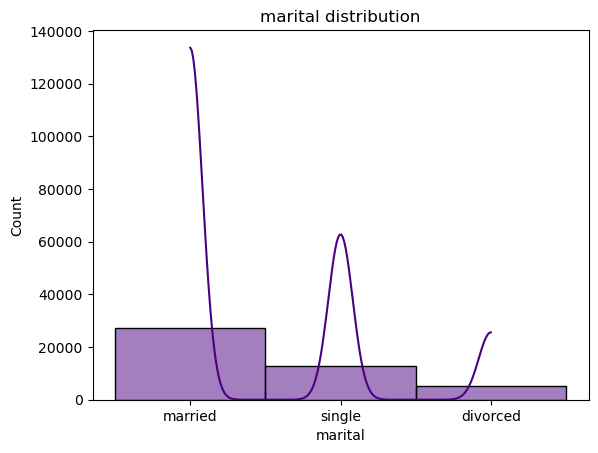

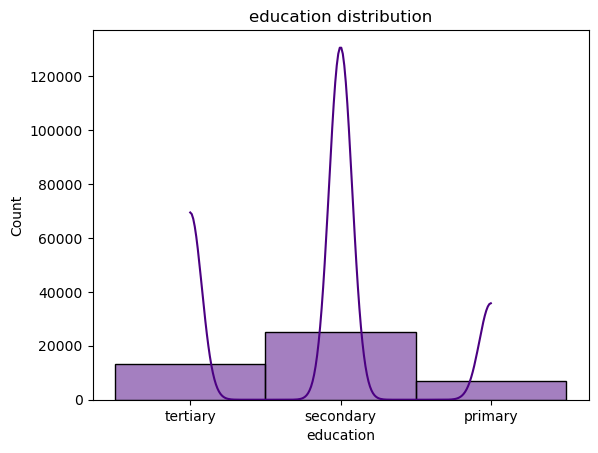

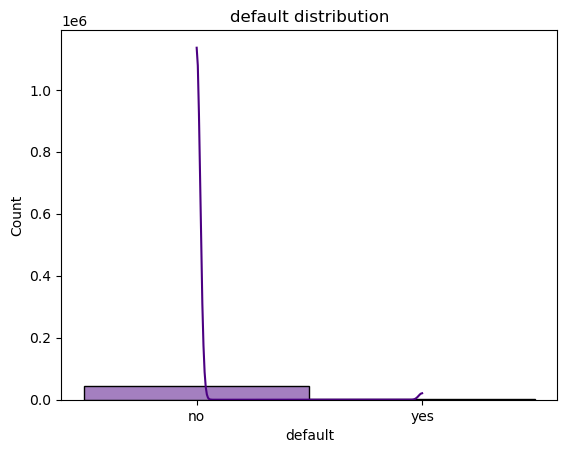

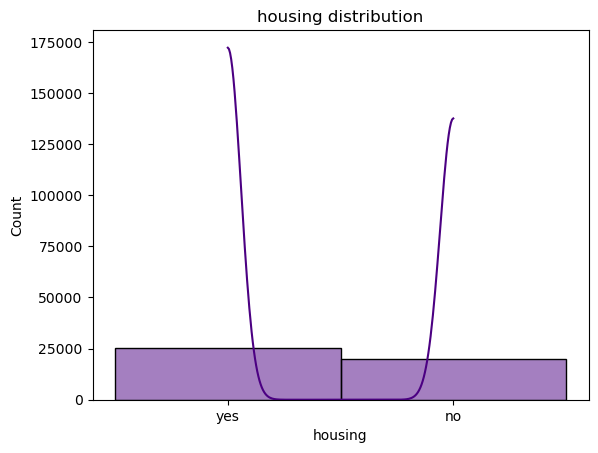

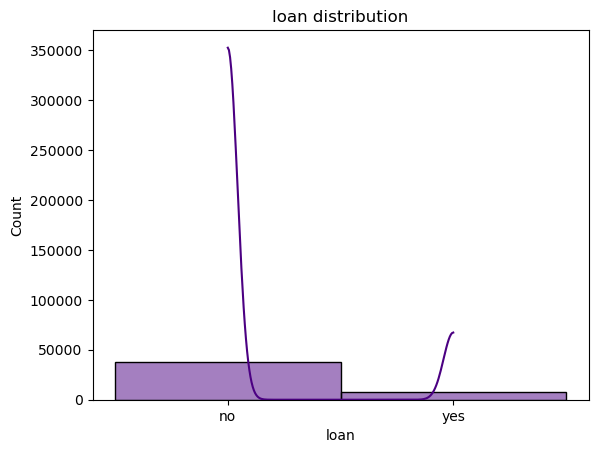

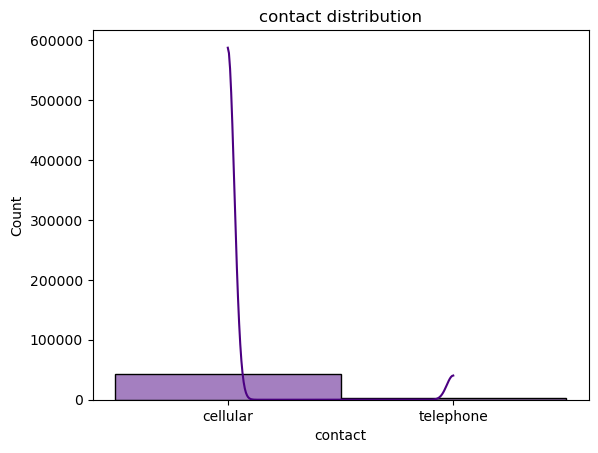

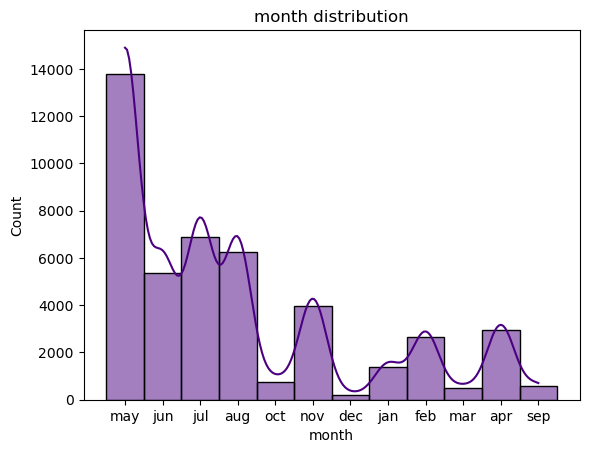

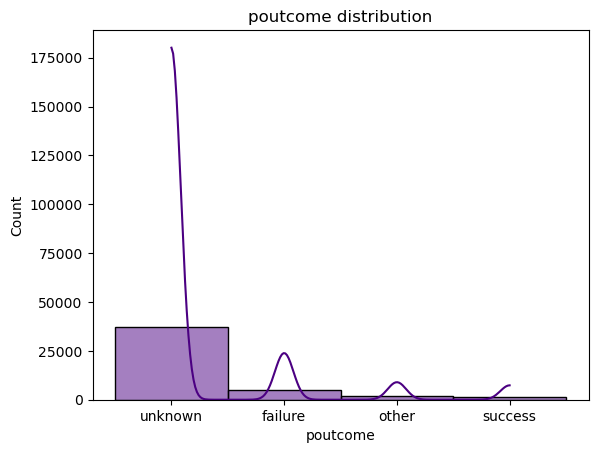

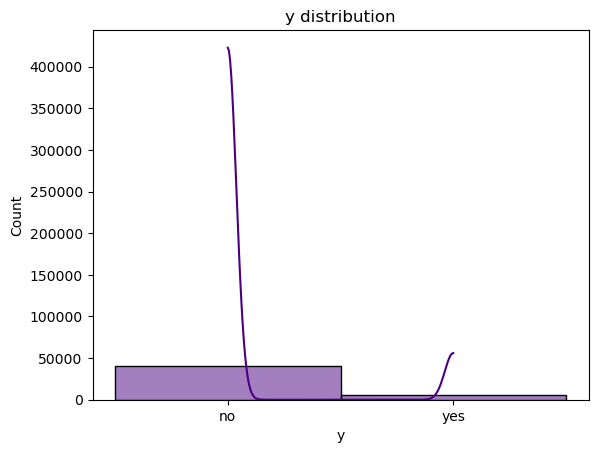

In [23]:
# Visualize distributions (e.g., histograms or boxplots)
# import seaborn as sns
# import matplotlib.pyplot as plt

# Histogram for numerical values 
for col in numerical_columns:
    sns.histplot(df_cleaned[col],kde=True, bins=30, color='indigo')
    plt.title(f"{col} distribution")
    plt.xlabel=(col)
    plt.ylabel = ('Frequency')
    plt.show()

# Histogram for categorical values 
for col in categorical_columns:
    sns.histplot(df_cleaned[col],kde=True, bins=30, color='indigo')
    plt.title(f"{col} distribution")
    plt.xlabel=(col)
    plt.ylabel = ('Frequency')
    plt.show()

# # Example: Visualize balance distribution
# sns.histplot(df_cleaned['balance'], kde=True)
# plt.title("Balance Distribution")
# plt.show()


In [ ]:
AR1 = pd.read_csv('../data/sql/age_range_analysis.csv',sep=',')  # reading the full dataset of bank
print(AR1)
AR2 = pd.read_csv('../data/sql/default_analysis.csv',sep=',')  # reading the full dataset of bank
print(AR2)
AR3 = pd.read_csv('../data/sql/housing_loan_analysis.csv',sep=',')  # reading the full dataset of bank
AR4 = pd.read_csv('../data/sql/job_analysis.csv',sep=',')  # reading the full dataset of bank
AR5 = pd.read_csv('../data/sql/marital_status_analysis.csv',sep=',')  # reading the full dataset of bank
AR6 = pd.read_csv('../data/sql/personal_loan_analysis.csv',sep=',')  # reading the full dataset of bank


In [ ]:
AR1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
#x = np.linspace(0, 10, 100)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns

# Loop through each subplot
for i, ax in enumerate(axes.flat):  # Flatten the 2D array for iteration
    ax.plot(x, np.sin(x + i))  # Example plot: sine waves with offsets
    ax.set_title(f"Plot {i+1}")  # Set a unique title for each subplot
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create the bar plot for Subscription Percentage vs Age Range
plt.figure(figsize=(10, 6))
sns.barplot(data=AR1, x='age_range', y='subscription_percentage', palette='viridis')
plt.title('Subscription Percentage by Age Range')
# plt.xlabel('Age Range')
# plt.ylabel('Subscription Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
AR2

In [ ]:
# Create the bar plot for Credit Dafault and subscription Percentage 
plt.figure(figsize=(10, 6))
sns.barplot(data=AR2, x='Has credit in default?', y='subscription_percentage', palette='viridis')
plt.title('Subscription Percentage by Age Range')
# plt.xlabel("Credit_Default")
# plt.ylabel('Subscription Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
AR3

In [ ]:
# Create the bar plot for Housing Loan and subscription Percentage 
plt.figure(figsize=(10, 6))
sns.barplot(data=AR3, x='Has housing loan?', y='subscription_percentage', palette='viridis')
plt.title('Subscription Percentage by Age Range')
# plt.xlabel("Credit_Default")
# plt.ylabel('Subscription Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
AR4

In [ ]:
# Create the bar plot for job and subscription Percentage 
plt.figure(figsize=(10, 6))
sns.barplot(data=AR4, x='job', y='subscription_percentage', palette='viridis')
plt.title('Subscription Percentage by Job Type')
# plt.xlabel("Credit_Default")
# plt.ylabel('Subscription Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
AR5

In [ ]:
# Create the bar plot for marital status and subscription Percentage 
plt.figure(figsize=(10, 6))
sns.barplot(data=AR5, x='martial_status', y='subscription_percentage', palette='viridis')
plt.title('Subscription Percentage by Marital status')
# plt.xlabel("Credit_Default")
# plt.ylabel('Subscription Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
AR6

In [ ]:
# Create the bar plot for loan and subscription Percentage 
plt.figure(figsize=(10, 6))
sns.barplot(data=AR6, x='Has personal loan?', y='subscription_percentage', palette='viridis')
plt.title('Subscription Percentage by Personal loan')
# plt.xlabel("Credit_Default")
# plt.ylabel('Subscription Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Plot percentage graphs for numerical columns


for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    # Plot a histogram for each subscription group
    sns.histplot(data=df, x=col, hue='y', stat='percent', kde=True, bins=30, palette='viridis')
    plt.title(f"Percentage Distribution of {col} by Subscription")
    plt.xlabel({col})
    plt.ylabel("Percentage (%)")
    plt.legend(title='Subscription', labels=['No', 'Yes'])
    plt.show()


In [ ]:
categorical_columns

In [ ]:
df

In [ ]:
cate_col = [col for col in categorical_columns if col != 'y']
print(cate_col)

In [ ]:
# Plot percentage graphs for categorical columns
for col in cate_col:
    plt.figure(figsize=(8, 5))
    # Calculate percentage distribution for each category within the subscription groups
    grouped_percent = (
        df.groupby(['y', col]).size()
        .groupby(level=0).apply(lambda x: 100 * x / x.sum())
        .reset_index(name='Percentage')
    )
    sns.barplot(data=grouped_percent, x=col, y='Percentage', hue='y', palette='coolwarm')
    plt.title(f"Percentage Distribution of {col} by Subscription")
    plt.xlabel({col})
    plt.ylabel("Percentage (%)")
    plt.legend(title='Subscription', labels=['No', 'Yes'])
    plt.show()


In [ ]:
grouped_percent

In [ ]:
#  Boxplot for 'balance'. Helps to identify the outliers or skewed distribution
sns.boxplot(x=df_cleaned['balance'])
plt.title("Distribution of Balance")
plt.xlabel='Balance'
plt.ylabel = 'Count'
plt.show()

#  Relationship between 'balance' and 'y'
sns.boxplot(x=df_cleaned['y'], y=df_cleaned['balance'])
plt.title("Balance vs Subscription to Term Deposit")
plt.show()


We can obseve that balance amount around 100000 are outliers for the data

In [ ]:
# Correlation matrix
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

correlation_matrix = df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


 From Correlation Matrix we can observe that, 
 - pdays and previous = 0.45 
 - day and campaign = 0.16
 - age and balance = 0.098


In [ ]:
# Combining Different Plots

# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# import pandas as pd

# Example Data
# x = np.linspace(0, 10, 100)
# y = np.sin(x)
# z = np.cos(x)

# # Example dataframe for bar plot
# data = pd.DataFrame({
#     "category": ['A', 'B', 'C', 'D'],
#     "values": [10, 20, 15, 25]
# })

# Create the subplot grid (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Line Plot
sns.countplot(data=df, x='poutcome', hue='y',ax= axes[0,0])
#axes[0, 0].plot(x, y, label='sin(x)', color='blue')
axes[0, 0].set_title('poutcome vs Subscription')
axes[0, 0].legend()

# Plot 2: Scatter Plot
sns.countplot(data=df, x='contact', hue='y', ax = axes[0,1])
#axes[0, 1].scatter(x, z, color='red', alpha=0.6)
axes[0, 1].set_title('contact vs subscription')

# Plot 3: Bar Plot
sns.barplot(data=df, x='month', y='y', ax=axes[0, 2], palette='viridis')
axes[0, 2].set_title('Bar Plot')

# Plot 4: Histogram
pd.crosstab(df['education'], df['y']).plot(kind='bar', stacked=True,ax = axes[1,0])
#axes[1, 0].hist(y, bins=20, color='green', alpha=0.7)
axes[1, 0].set_title('Histogram')

# Plot 5: Box Plot
sns.boxplot(x='loan', y='y', data=df, ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Box Plot')

# Plot 6: Pie Chart
axes[1, 2].pie(df['month'], labels=df['y'], autopct='%1.1f%%', startangle=90)
axes[1, 2].set_title('Pie Chart')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#  line plot for 'poutcome' vs output variable y.
ax1 = sns.countplot(data=df, x='poutcome', hue='y')
plt.title("poutcome vs Subscription")
#plt.xticks(np.arange(0, 100, step=10))  # Set label locations.
#plt.xticks(0,10)
plt.show()

#  line plot for 'balance'. Helps to identify the outliers or skewed distribution
ax2 = sns.countplot(data=df, x='contact', hue='y')
plt.title("contact vs Subscription")
#plt.xticks(np.arange(0, 100, step=10))  # Set label locations.
#plt.xticks(0,10)
plt.show()

#  line plot for 'balance'. Helps to identify the outliers or skewed distribution
ax3 = sns.countplot(data=df, x='contact', hue='y')
plt.title("contact vs Subscription")
#plt.xticks(np.arange(0, 100, step=10))  # Set label locations.
#plt.xticks(0,10)
plt.show()

# Grouped Bar Plot
# Shows the distribution of one categorical variable grouped by another.
# Use Case: Compare education grouped by housing.

ax4 = sns.countplot(x='poutcome', hue='y', data=df)
plt.title("Relation of poutcome and Subscription")
plt.xticks(rotation=45)
plt.show()

#Use Case: Analyze columns like job, education, marital, etc.

# Example for the 'job' column
ax5 = sns.countplot(x='marital', hue='y', data=df)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Distribution of marital Categories")
plt.show()

# Stacked Bar Plot
# Shows the distribution of one categorical variable across another.
# Use Case: Compare education across y (outcome of campaign).

ax6 = pd.crosstab(df['education'], df['y']).plot(kind='bar', stacked=True)
plt.title("Education vs. Campaign Outcome")
#plt.xlabel('Education')
#plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# analyze trends over time (by month).
# Aggregate subscriptions by month
monthly_data = df_cleaned.groupby('month')['y'].value_counts().unstack()
monthly_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Monthly Subscriptions")
plt.show()


In [ ]:
#  line plot for 'Age'.
sns.countplot(data=df, x='age', hue='y')
plt.title("Age vs Subscription")
plt.xticks(np.arange(0, 100, step=10))  # Set label locations.
#plt.xticks(0,10)
plt.show()


In [ ]:
# Frequency of 'job' types for each outcome
sns.countplot(data=df_cleaned, x='job', hue='y')
plt.title("Job vs Subscription")
plt.xticks(rotation=90)
plt.show()

# Insights:
# Understand which features might influence the target variable.
# Identify trends or patterns (e.g., specific job types subscribing more).




In [ ]:
# Pairwise plots help visualize relationships between features.
n1_cols = ['duration', 'campaign', 'pdays']
n2_cols = ['contact','poutcome','duration']
sns.pairplot(df_cleaned, vars=n1_cols, hue='y', diag_kind="kde")
plt.show()


In [ ]:
sns.pairplot(df_cleaned, vars=n2_cols, hue='y', diag_kind="kde")
plt.show()


**Outliers**

Outliers are data points that differ significantly from the majority of the dataset. Identifying and handling outliers is crucial for ensuring the robustness of data analysis and machine learning models. Here's how you can identify and deal with outliers:

Identifying Outliers
1. Visualization Methods

Box Plot: Displays the interquartile range (IQR) and highlights outliers beyond whiskers.

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data['column_name'])
plt.show()

Scatter Plot: Useful for identifying outliers in two dimensions.

plt.scatter(data['x_column'], data['y_column'])
plt.show()


2. Statistical Methods

Z-Score Method:
Calculates the standard deviation distance of a data point from the mean.

from scipy.stats import zscore

data['z_score'] = zscore(data['column_name'])
outliers = data[data['z_score'].abs() > 3]  # Threshold: 3

Interquartile Range (IQR):
Values beyond 
Q1−1.5×IQR or 
Q3+1.5×IQR are considered outliers.

python
Copy code
Q1 = data['column_name'].quantile(0.25)
Q3 = data['column_name'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['column_name'] < lower_bound) | (data['column_name'] > upper_bound)]


**When to Remove vs. Retain Outliers**

Remove: If outliers are due to measurement errors or are irrelevant to the problem.

**Remove outliers based on IQR**

cleaned_data = data[(data['balance'] >= lower_bound) & (data['balance'] <= upper_bound)]

print("Cleaned data shape:", cleaned_data.shape)


Retain/Cap: If they carry valuable information, e.g., identifying fraud or anomalies.

Option 2: Cap Outliers
Cap extreme values at the IQR thresholds to reduce their influence.

Cap outliers for 'balance'
data['balance'] = data['balance'].clip(lower=lower_bound, upper=upper_bound)

Option 3: Transform Data
Apply a log transformation to normalize skewed data and reduce the effect of outliers.

\n python
Copy code

import numpy as np

data['log_balance'] = np.log1p(data['balance'])

Use Robust Models: Algorithms like Random Forest or Gradient Boosting are less sensitive to outliers.

Option 4: Use Robust Models

Use models like Isolation Forest or DBSCAN for automatic outlier detection and removal.

python
Copy code

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)
data['outlier'] = iso.fit_predict(data[['column_name']])
data = data[data['outlier'] == 1]  # Keep only inliers


If you're building a model, use algorithms like Random Forest or XGBoost that are less sensitive to outliers.



# we choose option :4 

Use models like Isolation Forest or DBSCAN for automatic outlier detection and removal.

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)
data['outlier'] = iso.fit_predict(data[['column_name']])
data = data[data['outlier'] == 1]  # Keep only inliers

                                OR
                                
We are going to use XGBoost and Random Forest algorithms for building model
If you're building a model, use algorithms like Random Forest or XGBoost that are less sensitive to outliers.


# Step 4: Feature Engineering

Goal: Create new features or modify existing ones to improve model performance.

Actions:

- Group numerical values (e.g., age groups).
- Create interaction features (e.g., balance_per_campaign).
- Encode categorical variables.(previously done)


**Standardize text formatting for categorical columns.**

To standardize the categorical data in the bank-full.csv file, follow these steps:

1. Separate Numerical and Categorical Columns
Start by identifying which columns are numerical and which are categorical.
2. Clean and Standardize Categorical Data
    (a) Clean Values
    Use string operations to ensure consistency:
    for col in categorical_columns:
        data_full_parsed[col] = data_full_parsed[col].str.lower().str.strip()

    (b) Encode Categorical Values
    
        Depending on the type of categorical data:

        1. Label Encoding for ordinal data:

            from sklearn.preprocessing import LabelEncoder

            le = LabelEncoder()
            for col in categorical_columns:
             data_full_parsed[col] = le.fit_transform(data_full_parsed[col])


        2. One-Hot Encoding for nominal data:

        data_full_parsed = pd.get_dummies(data_full_parsed, columns=categorical_columns, drop_first=True)


In [ ]:
#define categorical_columns
cate_cols = ['job', 'marital', 'education', 'default', 'housing', 'contact', 'poutcome', 'loan', 'month', 'y']

# Clean and encode categorical data
for col in cate_cols:
    df_cleaned[col] = df_cleaned[col].str.lower().str.strip()

# Encode nominal categorical data (One-Hot Encoding)
df_encoded = pd.get_dummies(df_cleaned, columns=cate_cols, drop_first=True)


print("cleaned and categorical encoded data is ready for feature engineering : df_encoded ")
df_encoded.shape

In [ ]:
df_encoded

In [ ]:

# converted categorical columns(True/False) in to numerical column(0/1)
# Replace True and False with 1 and 0

df_processed = df_encoded.replace({True : 1, False : 0})

print(df_processed.info())
print(df_processed.head())

# Step 5: Data Transformation

Goal: Prepare the data for modeling by standardizing numerical features and handling imbalances in the target variable.

Actions:
- Scale numerical columns. (standardization of data and validation of standardized data)
- Address class imbalance using techniques like SMOTE.

To standardize the data in the bank-full.csv file, follow these steps:

1. Standardize Numerical Columns
Use StandardScaler from sklearn to scale numerical features:
This step transforms the numerical features to have a mean of 0 and standard deviation of 1.

2. Validate the Standardization
After standardization, check that the numerical data has been scaled correctly and the categorical data is encoded:


In [ ]:
# Standardize the values (numerical and categorical)
from sklearn.preprocessing import StandardScaler


# Separate columns
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Standardize numerical data
scaler = StandardScaler()
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])


# Validate changes

print(df_processed.describe())  # For numerical columns
#print(df_processed)     # To verify encoded categorical columns
#print(df.size)
print(df_processed.columns)
df_processed.shape

In [ ]:
df_processed

** Saperate the features and output/target variables**

In [ ]:
#Separate X = features and y = target/output

X = df_processed.drop('y_yes', axis =1)
y = df_processed['y_yes']

print("X features data :", X)
print("y target data :", y)

**Class Imbalance:**

Class imbalance occurs in a dataset when the distribution of classes in the target variable is significantly skewed, meaning one class is much more frequent than the other(s). This is common in many real-world scenarios, such as:

Fraud detection (fraudulent transactions are rare compared to legitimate ones).
Disease diagnosis (the number of patients with a specific disease may be much smaller than those without it).
Customer churn (only a minority of customers may churn).
For example, in a binary classification problem, if 90% of the data belongs to Class A and only 10% belongs to Class B, the dataset is imbalanced.

Why Is Class Imbalance a Problem?
Bias Toward the Majority Class: Many machine learning models optimize for overall accuracy, which may lead to predicting the majority class more often while neglecting the minority class.

Example: A model predicting only Class A in the above example will achieve 90% accuracy but fail to identify any instances of Class B.
Poor Performance Metrics: Metrics like accuracy become misleading since they do not consider the imbalance.

Precision, recall, F1-score, and AUC-ROC are better alternatives in such cases.
Impact on Model Learning:

Models may fail to learn patterns for the minority class due to insufficient examples.
The decision boundary may skew toward the majority class, reducing the model's ability to generalize.
How to Detect Class Imbalance
Inspect the distribution of the target variable:

Code Example:

**Check class distribution**
print(data['target'].value_counts(normalize=True))
Output:
If the result shows something like:

makefile
Copy code
0: 90%
1: 10%
You have an imbalanced dataset.

In [ ]:
# Check class distribution in the target variable 'y'
print(df['y'].value_counts(normalize=True) * 100)


Output Interpretation:

If one class (e.g., 'no' or 'yes') has significantly fewer samples, the dataset is imbalanced.
Example: 90% 'no' and 10% 'yes'.

For here 88% no and 12% yes


Approaches to Address Class Imbalance
Resampling Techniques:

- Oversampling the Minority Class: Duplicate or synthesize samples of the minority class (e.g., using    SMOTE - Synthetic Minority Oversampling Technique).

python
Copy code
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

- Undersampling the Majority Class: Randomly remove samples from the majority class to balance the dataset.

python
Copy code
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

- Generate Synthetic Data: Use techniques like SMOTE or ADASYN to generate synthetic data points for the minority class.

- Class Weighting: Assign higher weights to the minority class during training to penalize misclassifications more heavily.

python
Copy code
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')

- Use Algorithms Designed for Imbalanced Data: Algorithms like XGBoost, LightGBM, or CatBoost have built-in parameters for handling class imbalance.

Evaluation Metrics:

Use metrics such as precision, recall, F1-score, AUC-ROC, or a confusion matrix instead of accuracy.
For example:
python
Copy code
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
Ensemble Methods:

Use methods like Balanced Random Forest or EasyEnsemble, which are designed for imbalanced datasets.
Summary
Class imbalance should not be ignored as it can skew model performance. By employing one or a combination of the above strategies, you can mitigate its effects and build a model that performs well across all classes. Would you like to address class imbalance for your dataset?



**Approches to Choose a Strategy to Address Imbalance**

**Option A: Oversampling the Minority Class**

This strategy generates additional examples for the minority class. The most popular method is SMOTE.

Code:
python
Copy code
from imblearn.over_sampling import SMOTE

- Separate features and target
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target to binary

- Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

- Check new class distribution
from collections import Counter
print("Resampled class distribution:", Counter(y_resampled))


When to Use:
Use when the dataset is large enough, as oversampling increases data size.

**Option B: Undersampling the Majority Class**

This strategy removes samples from the majority class to balance the dataset.

Code:

from imblearn.under_sampling import RandomUnderSampler

- Apply Random Under Sampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

- Check new class distribution

print("Resampled class distribution:", Counter(y_resampled))

When to Use:
Use when the dataset is large, and removing some majority class data won't impact model training.

**Option C: Combine Over- and Undersampling**

Balance the dataset using a combination of oversampling and undersampling.

Code:

from imblearn.combine import SMOTEENN

- Apply SMOTE + Edited Nearest Neighbors
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print("Resampled class distribution:", Counter(y_resampled))

**Option D: Assign Class Weights**

Most classifiers support a class_weight parameter to handle imbalance by penalizing misclassification of the minority class.

Code:
python
Copy code
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

- Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Train Random Forest with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

- Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

When to Use:
Use when you prefer not to alter the dataset directly.


We’ll implement SMOTE (Synthetic Minority Oversampling Technique) to oversample the minority class.

 This is an effective and commonly used method when you want to augment the minority class without losing any data.

Here’s how we’ll handle this step by step:

Step 1: Separate Features and Target
We need to isolate the target variable y and the features from the dataset.

In [ ]:
# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target to binary (0 or 1)

# Check the class distribution
print("Class distribution before resampling:")
print(y.value_counts(normalize=True) * 100)


Step 2: Apply SMOTE
We’ll use the imblearn library to oversample the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after resampling:")
print(Counter(y_resampled))


Compare Results
After completing the steps:

Compare model performance before and after applying SMOTE.
Check if the model improves its ability to predict the minority class (y='yes').

**Evaluate the Impact**

After applying your chosen strategy:

Split the resampled dataset into training and testing sets.
Train a machine learning model.

Use metrics like precision, recall, F1-score, and ROC-AUC to evaluate performance.

Code for Model Training and Evaluation:
python
Copy code
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

- Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


**Document Your Process**

Explain the class imbalance issue and the strategy chosen.
Justify the approach based on the dataset size and class distribution.
Highlight model improvements after addressing imbalance.


In [ ]:
#from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# scaler = StandardScaler()
# df_num[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Handle class imbalance
X = df_processed.drop('y', axis=1)
y = df_processed['y']
smote = SMOTE()
X, y = smote.fit_resample(X, y)


# Step 6: Split the Data

Goal: Divide the dataset into training and testing subsets.

Actions:
Split data into training (80%) and testing (20%).
python
Copy code


In [ ]:
#define categorical_columns
cate_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']


# Clean and encode categorical data
for col in cate_cols:
    cleaned_df[col] = cleaned_df[col].str.lower().str.strip()


# Encode nominal categorical data (One-Hot Encoding)
df_encoded = pd.get_dummies(cleaned_df, columns=cate_cols, drop_first=True)

# Replace True and False with 1 and 0

df_encoded = df_encoded.replace({True : 1, False : 0})

df_encoded

In [ ]:
#importing standardscaler for standardization of numeric columns

from sklearn.preprocessing import StandardScaler, LabelEncoder

Which shows the size of our dataset df is 43193 rows and 36 columns

# Exploratory Visualization of initial data: 

In [ ]:
# Histogram for age 
sns.histplot(df_encoded['age'],kde=True, bins=30, color='indigo')

# Step 3: Data Visualization:

Goal: Represent data insights visually for better understanding.

Key Actions:

Use tools like Matplotlib, Seaborn, Power BI, or Tableau.
Create charts, graphs, and dashboards.

In [ ]:
import matplotlib.pyplot as plt
import scipy 

In [ ]:
# Visualize distributions (e.g., histograms or boxplots)
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for 'balance'
sns.boxplot(x=df['balance'])
plt.title("Distribution of Balance")
plt.show()
